In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

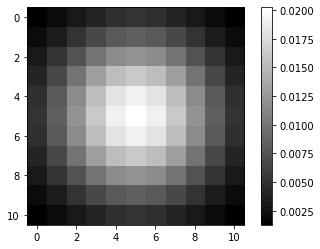

In [3]:
def get_gaussian(size, sigma):
    """
    returns a
     2D Gaussian matrix for input size and scale
    size: kernel size
    sigma: Gaussian standard deviation
    """

    const = 1/(2 * np.pi * (sigma ** 2))
    gauss_matrix = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            gauss_matrix[i,j] = const * np.exp(-0.5 * ((i-size//2)**2 + (j-size//2)**2)/ (sigma**2))
    gauss_matrix = gauss_matrix / np.sum(gauss_matrix)
    
    return gauss_matrix

def plot_gauss(matrix):
    fig, ax = plt.subplots()
    im = ax.imshow(matrix, cmap = "gray")
    fig.colorbar(im, orientation='vertical')

gauss_matrix = plot_gauss(get_gaussian(11,3))

In [4]:
def get_Sobel_filter():
    """
    get two sobel filter as required
    """
    Ax = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]])
    Ay = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]])
    return Ax , Ay


def convolution(img, filter):
    """
    write convolution between image and sobel filter
    """

    # prepare filter for convolution
    filter = np.flip(filter, 0)
    filter = np.flip(filter, 1)

    filter_size = filter.shape[0]
    h,w = img.shape

    # expand the image by padding size
    padding = filter_size // 2
    expand_img = np.zeros((h + padding * 2, w + padding * 2))
    # leave the padding entry be 0, the center be the original image
    expand_img[padding:-padding, padding:-padding] = img
    

    # do convolution
    result = np.zeros(img.shape)
    for i in range(h):
        for j in range(w):
            result[i,j]= (filter * expand_img[i:i+filter_size, j:j+filter_size]).sum()
    
    return result

def gradient_magnitude(img):
    """
    get the magnitude of the derivatives
    """
    filter_x, filter_y = get_Sobel_filter()
    grad_x = convolution(img, filter_x)
    grad_y = convolution(img, filter_y)
    grad_mag = np.sqrt(grad_x**2 + grad_y**2)
    return grad_mag


In [5]:
def set_threshold(img, epsilon):
    """
    get the threshold by recursion, and return a black ang white image
    """
    img_grad = gradient_magnitude(img)
    curr = img_grad.mean()
    prev = -100

    index = 0
    while(abs(curr-prev) > epsilon and index < 10000000):
        # divide into lower and upper class by current mean
        lower_class = img_grad[img_grad < curr]
        upper_class = img_grad[img_grad >= curr]
        # calculate mean for lower and upper class
        lower_mean = lower_class.mean()
        upper_mean = upper_class.mean()
        # get new threshold
        prev = curr
        curr = (lower_mean + upper_mean) / 2
        # avoid infinite loop
        index += 1
    
    # add edge color
    result = np.zeros(img.shape)
    result[img_grad >= curr] = 255
    
    return result


(650, 980)


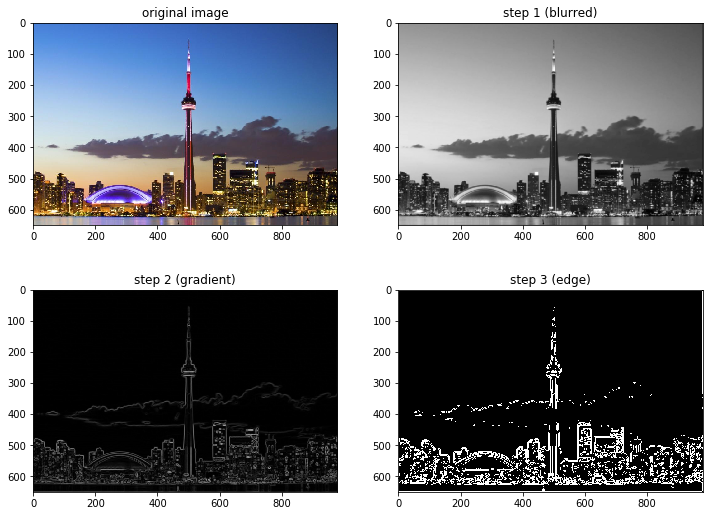

In [16]:
img = cv2.imread('assignment1/A1_images/image1.jpg')

newimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(2,2, figsize = (12,9))
axs[0,0].imshow(newimg)
axs[0,0].title.set_text("original image")
img = cv2.cvtColor(np.float32(img), cv2.COLOR_RGB2GRAY)
print(img.shape)

size = 11
delta = 1
blurred_img = convolution(img, get_gaussian(size, delta))
axs[0,1].imshow(blurred_img, cmap = 'gray')
axs[0,1].title.set_text("step 1 (blurred)")
# plt.savefig('A1_images/blurred_3' + '.png')

grad_img = gradient_magnitude(blurred_img)
axs[1,0].imshow(grad_img, cmap = 'gray')
axs[1,0].title.set_text("step 2 (gradient)")
# plot_img(grad_img)
# plt.savefig('A1_images/gradient_3' + '.png')

eps = 1
result = set_threshold(grad_img, eps)
axs[1,1].imshow(result, cmap = 'gray')
axs[1,1].title.set_text("step 3 (edge)")
# plot_img(result)
# plt.savefig('A1_images/edges_3' + '.png')
# plt.tight_layout()



